## 🎉 Hi there! Welcome to today's assignment on Web Scraping in Python!

Are you ready to put your skills to the test? Let's dive right in! 💪📚

In this assignment, you will be working with scraping websites using Python . Don't worry if you're feeling a bit unsure - you got this! 🤞

Good luck! 🍀🚀

## **Activity 1:**


### **GitHub trending repos:**

You are tasked to scrape the top 10 trending repositories of Python on GitHub (https://github.com/trending/python?since=daily). Perform the following actions based on the data:

1. Retrieve the name of the repository, the username of the owner, and the URL of the repository.
2. Store the information in a CSV file named "python_trending_repos.csv".
3. Print the information in a tabular format using the PrettyTable library.

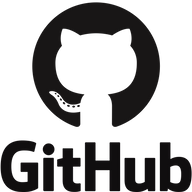

In [2]:
import requests
from bs4 import BeautifulSoup
from prettytable import PrettyTable
import csv

url = 'https://github.com/trending/python?since=daily'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
repo_list = soup.find_all('article', {'class': 'Box-row'})

csv_file = open('python_trending_repos.csv', 'w', newline='', encoding='utf-8')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Repository Name', 'Owner', 'URL'])

table = PrettyTable(['Repository Name', 'Owner', 'URL'])

for repo in repo_list[:10]:
    repo_info = repo.find_all('a')
    repo_name = repo_info[0].text.strip()
    owner = repo_info[1].text.strip()
    repo_url = 'https://github.com' + repo_info[0]['href']

    csv_writer.writerow([repo_name, owner, repo_url])
    table.add_row([repo_name, owner, repo_url])

csv_file.close()
print(table)


+-----------------+------------------------------+------------------------------------------------------------------------+
| Repository Name |            Owner             |                                  URL                                   |
+-----------------+------------------------------+------------------------------------------------------------------------+
|       Star      |        baichuan-inc /        |    https://github.com/login?return_to=%2Fbaichuan-inc%2Fbaichuan-7B    |
|                 |                              |                                                                        |
|                 |            baichuan-7B       |                                                                        |
|       Star      |         AntonOsika /         |    https://github.com/login?return_to=%2FAntonOsika%2Fgpt-engineer     |
|                 |                              |                                                                        |
|       

## **Activity 2:**



### **IMDB Movies:**

Your task is to scrape the top 10 movies currently playing in theaters in the United States from the website https://www.imdb.com/chart/top/.

Perform the following actions based on the data:

1. Extract movie titles: Extract the title of each movie and store it in a list.

2. Extract movie release year: Extract the release year of each movie and store it in a separate list.

3. Extract movie ratings: Extract the rating of each movie and store it in a separate list.

4. Export the data: Export the extracted data into a CSV file named "top_movies.csv".

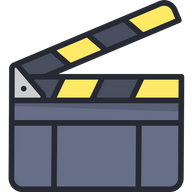

In [1]:
# Write your code here
import requests
from bs4 import BeautifulSoup
import csv

url = 'https://www.imdb.com/chart/top/'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

movie_rows = soup.select('tbody.lister-list tr')

titles = []
release_years = []
ratings = []

for row in movie_rows:
    title = row.find('td', class_='titleColumn').find('a').text.strip()
    titles.append(title)

    release_year = row.find('td', class_='titleColumn').find('span', class_='secondaryInfo').text.strip('()')
    release_years.append(release_year)

    rating = float(row.find('td', class_='imdbRating').find('strong').text.strip())
    ratings.append(rating)

movie_data = list(zip(titles, release_years, ratings))

filename = 'top_movies.csv'
with open(filename, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Title', 'Release Year', 'Rating'])
    writer.writerows(movie_data)

print(f"The data has been exported to {filename}.")



The data has been exported to top_movies.csv.


## **Activity 3:**



### **Covid-19 Cases:**

You are required to scrape the website https://www.worldometers.info/coronavirus/ to get the latest updates on COVID-19 cases worldwide.

1. Extract the Total Cases, Total Deaths, Total Recovered, and Active Cases data for all countries.

2. Save the data in a CSV file with appropriate column names and make sure to remove any commas or non-numeric characters from the data.

3. Clean the data to remove any missing values or inconsistencies. If there are any missing values, fill them appropriately.

4. Visualize the data using appropriate graphs and charts.

Note: Please make sure to be respectful of the website's terms of use and do not scrape any website that prohibits web scraping.

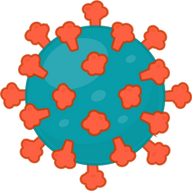

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://www.worldometers.info/coronavirus/'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', {'id': 'main_table_countries_today'})

headers = []
for th in table.select('thead th'):
    headers.append(th.text.strip())

data = []
for row in table.select('tbody tr'):
    row_data = []
    for td in row.find_all('td'):
        row_data.append(td.text.strip())
    data.append(row_data)

df = pd.DataFrame(data, columns=headers)

numeric_columns = ['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases']
df[numeric_columns] = df[numeric_columns].replace(',', '', regex=True)
df[numeric_columns] = df[numeric_columns].replace('[^\d.]', '', regex=True)

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

df.dropna(subset=numeric_columns, inplace=True)
df.fillna(0, inplace=True)

df.to_csv('covid_data.csv', index=False)


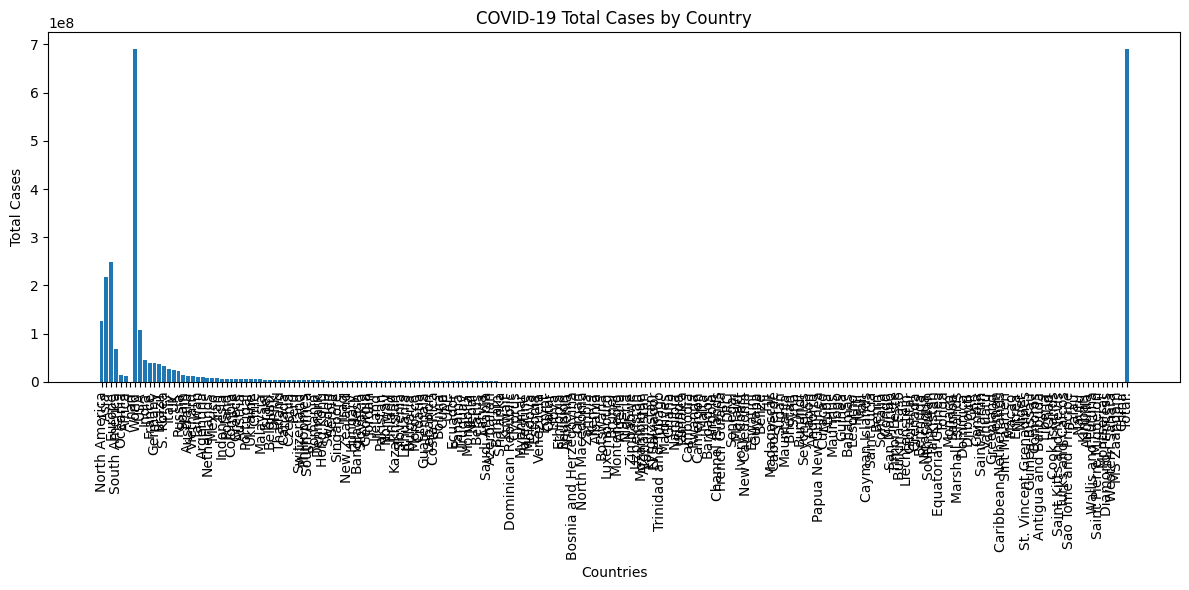

In [ ]:
import matplotlib.pyplot as plt

df = pd.read_csv('covid_data.csv')

df['Country,Other'] = df['Country,Other'].astype(str)

countries = df['Country,Other']
total_cases = df['TotalCases']

plt.figure(figsize=(12, 6))
plt.bar(countries, total_cases)
plt.xlabel('Countries')
plt.ylabel('Total Cases')
plt.title('COVID-19 Total Cases by Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
